### 匯入套件

In [33]:
import numpy as np 
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

### 導入資料

In [34]:
zoo_dir = "zoo.csv"
class_dir = "class.csv"

data_zoo = pd.read_csv(zoo_dir)
data_class = pd.read_csv(class_dir)

### 資料探索

In [35]:
data_class.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [36]:
data_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Class_Number                       7 non-null      int64 
 1   Number_Of_Animal_Species_In_Class  7 non-null      int64 
 2   Class_Type                         7 non-null      object
 3   Animal_Names                       7 non-null      object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


In [37]:
print(data_class["Class_Number"].unique()) #共有七種動物類別
print(data_class["Class_Type"].unique()) #七種類別分別代表的類別名

[1 2 3 4 5 6 7]
['Mammal' 'Bird' 'Reptile' 'Fish' 'Amphibian' 'Bug' 'Invertebrate']


In [38]:
data_zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [39]:
data_zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [40]:
data_zoo[data_zoo["class_type"] == 4]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
12,chub,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
18,dogfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
34,haddock,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
38,herring,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
60,pike,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
61,piranha,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
73,seahorse,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4


In [41]:
data_zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [42]:
print(len(data_zoo["animal_name"].unique())) #資料集中總共有100隻動物，除了frog

100


In [43]:
data_zoo[data_zoo["animal_name"] == "frog"] #frog 資料共有2筆

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [44]:
#合併資料
data = pd.merge(data_zoo, data_class, how='left', left_on='class_type', right_on='Class_Number') #左邊合併的資料用data_zoo,右邊的資料用class_type,以class_type合併
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


### 資料預處理

In [45]:
data[data.isnull().T.any()] #資料集並沒有空值

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   animal_name                        101 non-null    object
 1   hair                               101 non-null    int64 
 2   feathers                           101 non-null    int64 
 3   eggs                               101 non-null    int64 
 4   milk                               101 non-null    int64 
 5   airborne                           101 non-null    int64 
 6   aquatic                            101 non-null    int64 
 7   predator                           101 non-null    int64 
 8   toothed                            101 non-null    int64 
 9   backbone                           101 non-null    int64 
 10  breathes                           101 non-null    int64 
 11  venomous                           101 non-null    int64 
 12  fins    

### EDA


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   animal_name                        101 non-null    object
 1   hair                               101 non-null    int64 
 2   feathers                           101 non-null    int64 
 3   eggs                               101 non-null    int64 
 4   milk                               101 non-null    int64 
 5   airborne                           101 non-null    int64 
 6   aquatic                            101 non-null    int64 
 7   predator                           101 non-null    int64 
 8   toothed                            101 non-null    int64 
 9   backbone                           101 non-null    int64 
 10  breathes                           101 non-null    int64 
 11  venomous                           101 non-null    int64 
 12  fins    

In [48]:
data.drop(['Class_Number', 'Number_Of_Animal_Species_In_Class', 'Animal_Names'], axis=1, inplace=True)
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal


In [49]:
data[data["domestic"] == 1]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Type
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1,Mammal
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4,Fish
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1,Mammal
11,chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2,Bird
20,dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2,Bird
29,girl,1,0,0,1,0,0,1,1,1,1,0,0,2,0,1,1,1,Mammal
31,goat,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1,Mammal
35,hamster,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1,Mammal
39,honeybee,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0,6,Bug
57,parakeet,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2,Bird


In [50]:
data[data["domestic"] == 0]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,Mammal
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,Bug
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,Invertebrate


#### countplot(以動物類別做區分)

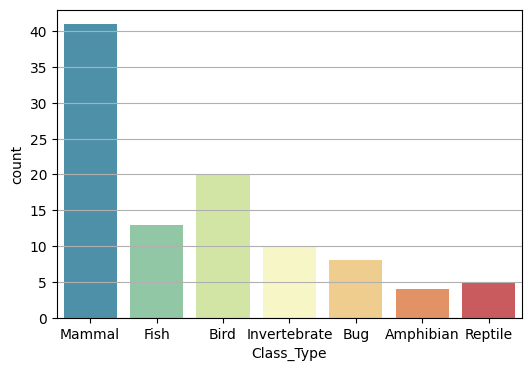

In [51]:
plt.figure(figsize = (6,4))
plt.grid(True)
ax = sns.countplot(x='Class_Type', data=data, palette='Spectral_r')

#### 相關性矩陣(查看變項與變項之間的相關性)

In [52]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna(axis = 'columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for animals', fontsize=15)
    plt.show()


C:\Users\SCU\AppData\Local\Temp\ipykernel_3204\3141814962.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


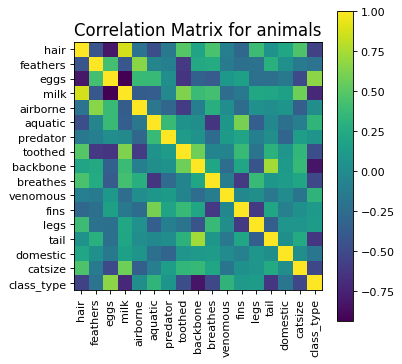

In [53]:
plotCorrelationMatrix(data,5) 

### 模型訓練

#### 切分訓練集&測試集

In [54]:
# Seperating all the categories of animals in a dictionary
animal_type = {}
animal_category = data.Class_Type.unique()
print("Seperating Categories...")
print(animal_category)
#建立animal dict
for category in animal_category:
    animal_type[category] = data[data['Class_Type']==category]
print("Seperation completed")
print(animal_type["Fish"]) #先以fish作check

Seperating Categories...
['Mammal' 'Fish' 'Bird' 'Invertebrate' 'Bug' 'Amphibian' 'Reptile']
Seperation completed
   animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
2         bass     0         0     1     0         0        1         1   
7         carp     0         0     1     0         0        1         0   
8      catfish     0         0     1     0         0        1         1   
12        chub     0         0     1     0         0        1         1   
18     dogfish     0         0     1     0         0        1         1   
34     haddock     0         0     1     0         0        1         0   
38     herring     0         0     1     0         0        1         1   
60        pike     0         0     1     0         0        1         1   
61     piranha     0         0     1     0         0        1         1   
73    seahorse     0         0     1     0         0        1         0   
82        sole     0         0     1     0         0        1

In [55]:
print(len(animal_type["Bird"]))
print(animal_type["Bird"].shape[0])#bird中有20筆資料
print(animal_type["Bird"].shape[0]*0.9)#bird中取前9成當訓練集

20
20
18.0


In [56]:
#Here we will split every category into trainig and test data
SPLIT = 0.9
train = pd.DataFrame() #to combine all the splited traning data from all categories
test = pd.DataFrame() #to combine all the splited test data from all categories
for category_name in animal_type:
    m = int(animal_type[category_name].shape[0] * SPLIT) #shape -> rowcount 
    train = pd.concat([train, animal_type[category_name].iloc[: m, :]])
    
    test = pd.concat([test, animal_type[category_name].iloc[m:, :]])
    
#Shuffling the train and test data randomly
train = train.sample(frac=1) #frac 抽樣的比數

test = test.sample(frac=1)
print(len(train)) #訓練集資料筆數
print(len(test)) #測試集訓練筆數
#確認資料是否平均切的正確
print(train["Class_Type"].unique())
print(test["Class_Type"].unique())

88
13
['Bird' 'Fish' 'Mammal' 'Reptile' 'Invertebrate' 'Bug' 'Amphibian']
['Fish' 'Amphibian' 'Bug' 'Mammal' 'Bird' 'Invertebrate' 'Reptile']


In [57]:
train.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Type
79,skua,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2,Bird
11,chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2,Bird
33,gull,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2,Bird
34,haddock,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4,Fish
50,mongoose,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal


In [58]:
#確認資料是否平均切的正確
print(train["Class_Type"].unique())
print(test["Class_Type"].unique())

['Bird' 'Fish' 'Mammal' 'Reptile' 'Invertebrate' 'Bug' 'Amphibian']
['Fish' 'Amphibian' 'Bug' 'Mammal' 'Bird' 'Invertebrate' 'Reptile']


In [59]:
# We have already split the data into 85% train and 15% test data
X_train = train.iloc[:,1:-2] # not using animal_name and class_type and Class_Type(category of animal)
y_train = train.iloc[:, -2] # class_type is the dependent feature
X_test = test.iloc[:, 1:-2]
y_test = test.iloc[:, -2]

In [60]:
print(X_train.head())


    hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
79     0         1     1     0         1        1         1        0   
11     0         1     1     0         1        0         0        0   
33     0         1     1     0         1        1         1        0   
34     0         0     1     0         0        1         0        1   
50     1         0     0     1         0        0         1        1   

    backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
79         1         1         0     0     2     1         0        0  
11         1         1         0     0     2     1         1        0  
33         1         1         0     0     2     1         0        0  
34         1         0         0     1     0     1         0        0  
50         1         1         0     0     4     1         0        1  


In [61]:
print(y_train.head())


79    2
11    2
33    2
34    4
50    1
Name: class_type, dtype: int64


In [62]:

print(X_test.head())


    hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
86     0         0     1     0         0        1         1        1   
89     0         0     1     0         0        1         0        1   
97     1         0     1     0         1        0         0        0   
92     0         0     1     0         0        1         1        1   
96     1         0     0     1         0        0         0        1   

    backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
86         1         0         1     1     0     1         0        1  
89         1         1         0     0     4     0         0        0  
97         0         1         1     0     6     0         0        0  
92         1         0         0     1     0     1         0        1  
96         1         1         0     0     2     1         0        1  


In [63]:

print(y_test.head())

86    4
89    5
97    6
92    4
96    1
Name: class_type, dtype: int64


In [64]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [65]:
np.unique(y_pred), np.unique(y_test) #確認是不是每個類別的有考慮進去

(array([1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array([1, 2, 3, 4, 5, 6, 7], dtype=int64))

In [66]:
y_train

79    2
11    2
33    2
34    4
50    1
     ..
87    2
47    1
35    1
10    1
77    7
Name: class_type, Length: 88, dtype: int64

In [67]:
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
79,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0
11,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0
33,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0
34,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
50,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1
47,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
35,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0
10,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


### 分析結果

In [68]:
print(f"Accuracy = {metrics.accuracy_score(y_test, y_pred)}") #準確度

print(metrics.classification_report(y_test, y_pred)) #模型結果表
#precision準確率、recall召回率、f1-score 召回率與準確率的平均、support 答對幾題


Accuracy = 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [120]:
values = [i for i in range(1, 51)]
train_scores, test_scores = list(), list()
for i in values:
    train_yhat = clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = clf.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))



>1, train: 1.000, test: 1.000
>2, train: 1.000, test: 1.000
>3, train: 1.000, test: 1.000
>4, train: 1.000, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 1.000, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000
>21, train: 1.000, test: 1.000
>22, train: 1.000, test: 1.000
>23, train: 1.000, test: 1.000
>24, train: 1.000, test: 1.000
>25, train: 1.000, test: 1.000
>26, train: 1.000, test: 1.000
>27, train: 1.000, test: 1.000
>28, train: 1.000, test: 1.000
>29, train: 1.000, test: 1.000
>30, train: 1.000, test: 1.000
>31, train: 1.000, test: 1.000
>32, train: 1.000, test: 1.000
>33, train: 1.000

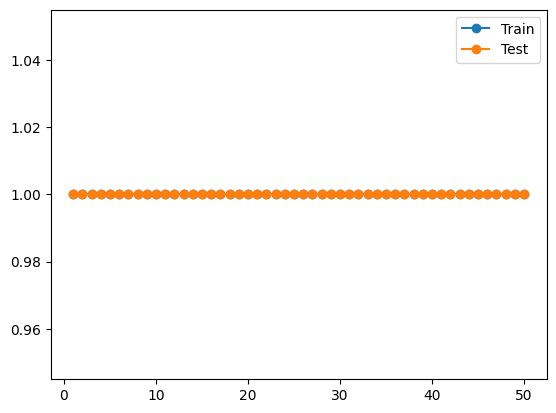

In [121]:
from matplotlib import pyplot
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [69]:
#利用class_map 將數字轉成文字類別
class_map = {}
for i in range(data_class.shape[0]):        
    class_map[data_class['Class_Number'].iloc[i]] = data_class['Class_Type'].iloc[i]
    
class_map

{1: 'Mammal',
 2: 'Bird',
 3: 'Reptile',
 4: 'Fish',
 5: 'Amphibian',
 6: 'Bug',
 7: 'Invertebrate'}

In [70]:
result = [class_map[i] for i in y_pred]
print("prediction values")
print(result)
print()
print("Real test y values")
print([class_map[i] for i in list(y_test)])

prediction values
['Fish', 'Amphibian', 'Bug', 'Fish', 'Mammal', 'Mammal', 'Bird', 'Invertebrate', 'Reptile', 'Mammal', 'Mammal', 'Bird', 'Mammal']

Real test y values
['Fish', 'Amphibian', 'Bug', 'Fish', 'Mammal', 'Mammal', 'Bird', 'Invertebrate', 'Reptile', 'Mammal', 'Mammal', 'Bird', 'Mammal']


In [71]:
y_test

86     4
89     5
97     6
92     4
96     1
93     1
95     2
99     7
91     3
84     1
98     1
100    2
94     1
Name: class_type, dtype: int64

In [ ]:
y_pred

array([5, 7, 1, 4, 2, 1, 5, 1, 1, 6, 1, 4, 2], dtype=int64)

In [ ]:
final = y_test
final['class_type'] = [i for i in y_test]
final

89                                                            5
99                                                            7
94                                                            1
86                                                            4
100                                                           2
98                                                            1
91                                                            3
93                                                            1
84                                                            1
97                                                            6
96                                                            1
92                                                            4
95                                                            2
predict                                                        
class_type    [5, 7, 1, 4, 2, 1, 3, 1, 1, 6, 1, 4, 2, , [5, ...
Name: class_type, dtype: object

In [ ]:
X_test

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
89,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
94,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0
86,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1
100,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
91,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0
93,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0
84,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0


In [ ]:
#將X_test預測結果與X_test答案作比對
final_prediction_df = X_test
final_prediction_df['class_type'] = [class_map[i] for i in y_test]
final_prediction_df['pred_class_type'] = [class_map[i] for i in y_pred]
final_prediction_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,pred_class_type
89,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0,Amphibian,Amphibian
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,Invertebrate,Invertebrate
94,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,Mammal,Mammal
86,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,Fish,Fish
100,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,Bird,Bird
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammal,Mammal
91,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,Reptile,Reptile
93,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,Mammal,Mammal
84,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0,Mammal,Mammal
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,Bug,Bug


In [ ]:
final={}

In [ ]:
final = final_prediction_df[["class_type","pred_class_type"]]
final

,class_type,pred_class_type
89,Amphibian,Amphibian
99,Invertebrate,Invertebrate
94,Mammal,Mammal
86,Fish,Fish
100,Bird,Bird
98,Mammal,Mammal
91,Reptile,Reptile
93,Mammal,Mammal
84,Mammal,Mammal
97,Bug,Bug


In [ ]:
#tried manually with human feature values
predd = {}
predd['HAIR'] = 0
predd['FEATHERS'] = 1
predd['EGGS'] = 1
predd['MILK'] = 0  #哺乳
predd['AIRBORNE'] = 0 #會飛
predd['AQUATIC'] = 1 #在水裡游
predd['PREDATOR'] = 1 
predd['TOOTHED'] = 1
predd['BACKBONE'] = 1
predd['BREATHES'] = 1
predd['VENOMOIS'] = 0 
predd['FINS'] = 0 
predd['LEGS'] = 2
predd['TAIL'] = 1
predd['DOMESTIC'] = 0  #家畜
predd['CATSIZE'] = 0 #體型小


pred_df = pd.DataFrame(data=predd, index=['value'])
pred_df.index = ["penquin"]
custom_pred = clf.predict(pred_df)
print(custom_pred)

[2]


C:\Users\SCU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- AIRBORNE
- AQUATIC
- BACKBONE
- BREATHES
- CATSIZE
- ...
Feature names seen at fit time, yet now missing:
- airborne
- aquatic
- backbone
- breathes
- catsize
- ...

  warnings.warn(message, FutureWarning)


In [ ]:
print(pred_df)
print(class_map[custom_pred[0]])

         HAIR  FEATHERS  EGGS  MILK  AIRBORNE  AQUATIC  PREDATOR  TOOTHED  \
penquin     0         1     1     0         0        1         1        1   

         BACKBONE  BREATHES  VENOMOIS  FINS  LEGS  TAIL  DOMESTIC  CATSIZE  
penquin         1         1         0     0     2     1         0        0  
Bird


In [ ]:
class_types = list(data_class['Class_Type'])
class_types

['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']

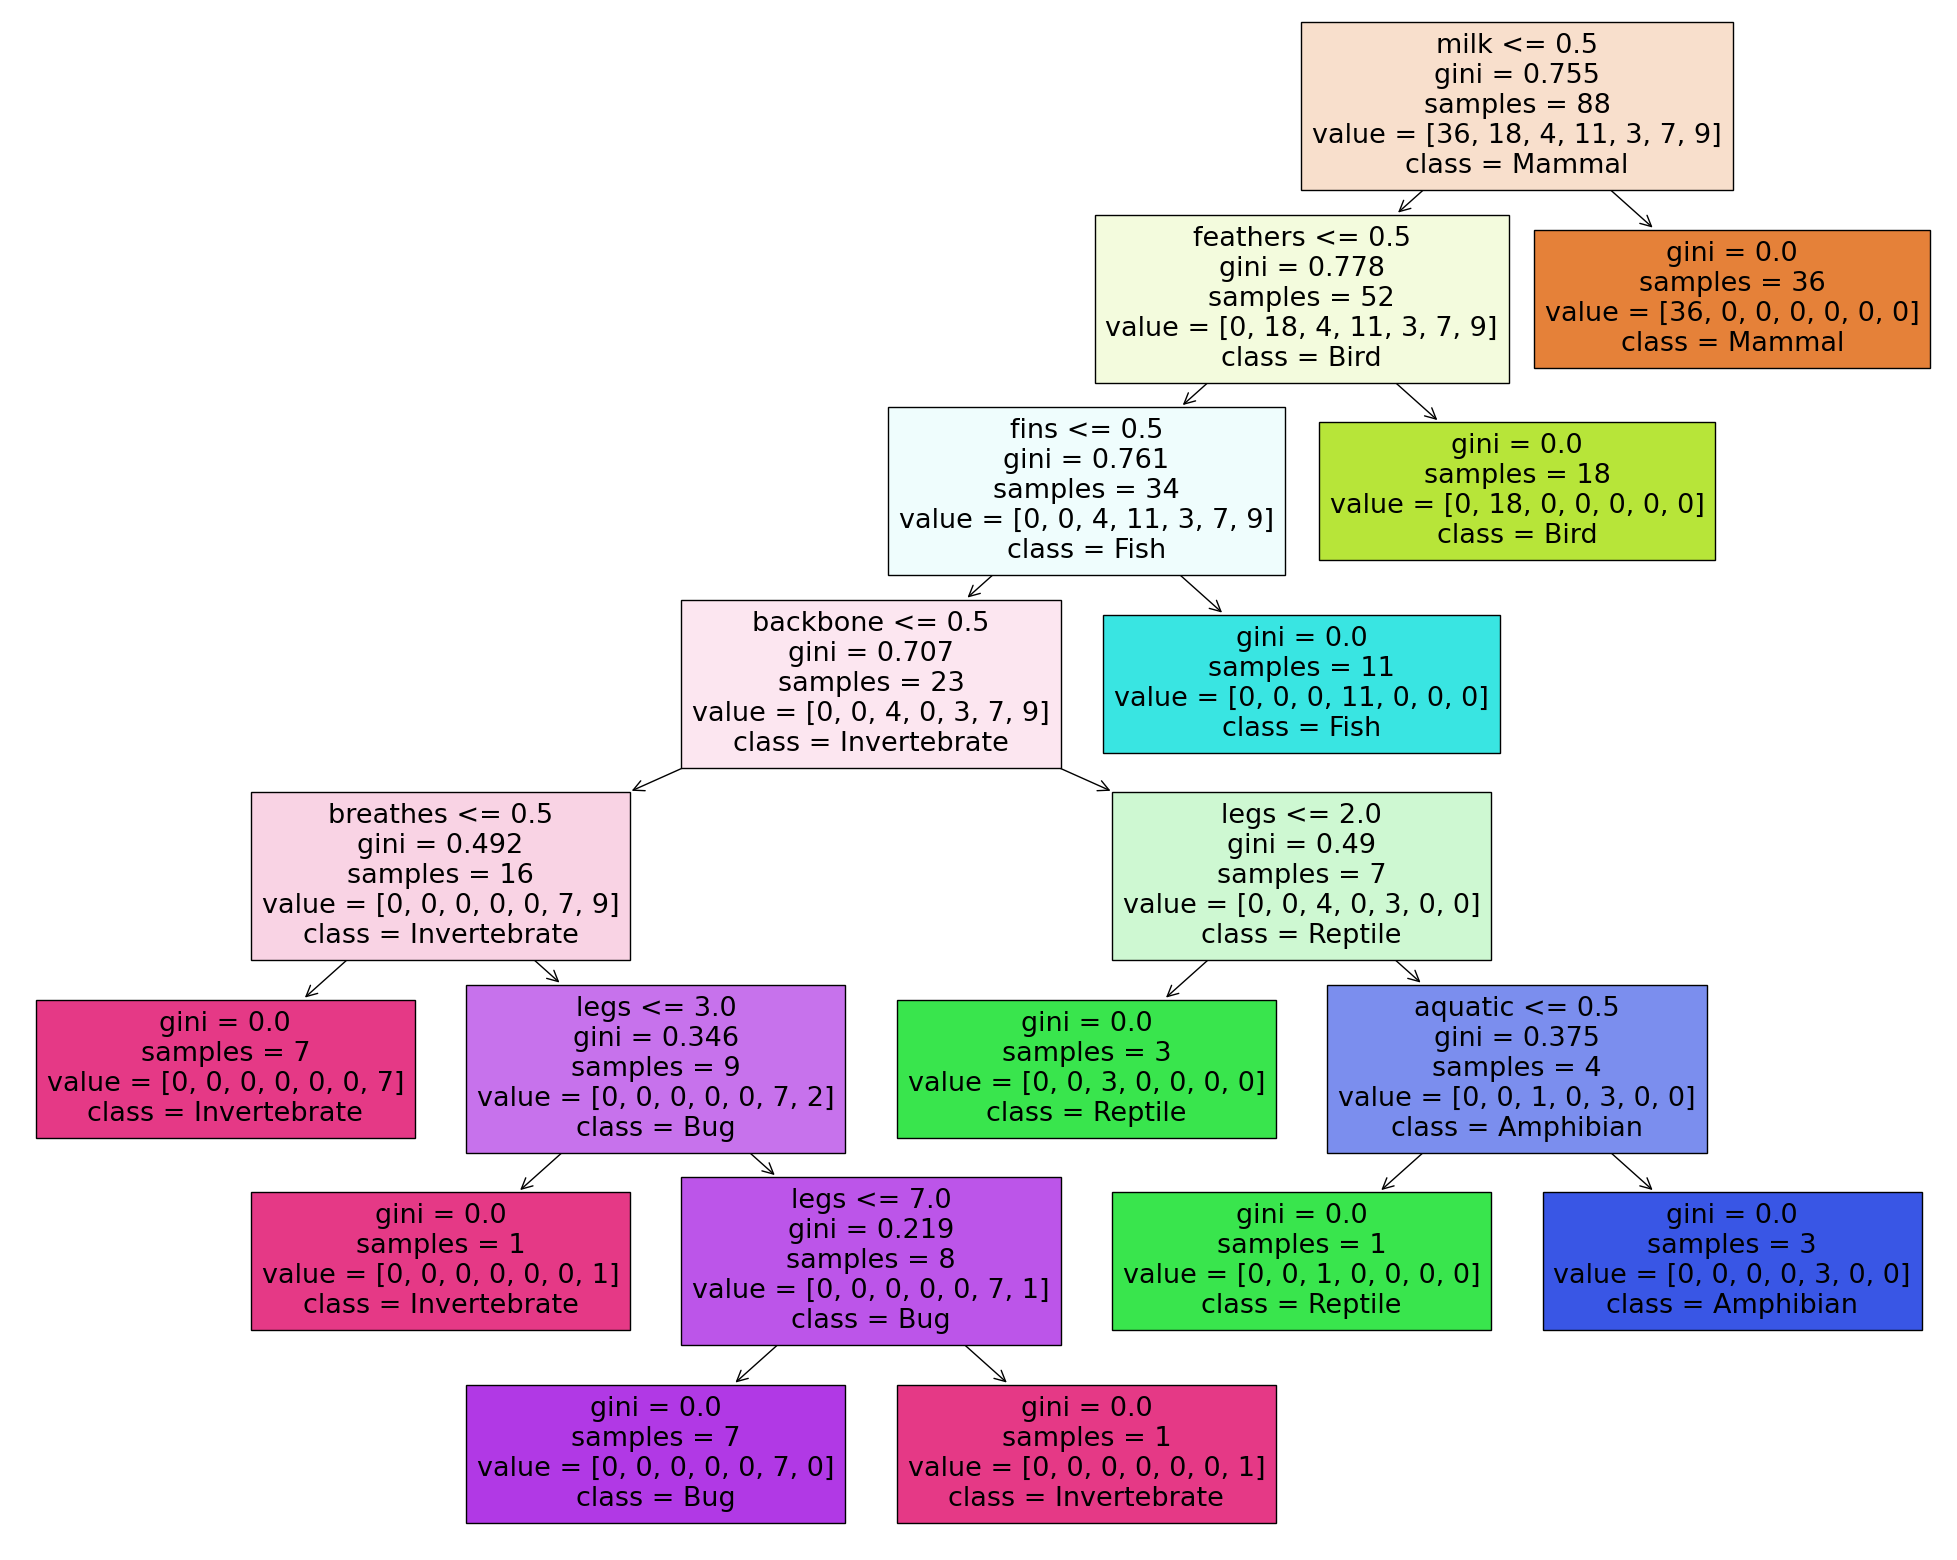

In [ ]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
fig = plot_tree(clf, feature_names=X_train.columns,  
                class_names=class_types, filled=True)\
    

In [98]:
### 測試資料
zoo = pd.read_csv("zoo3.csv")
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,anta,1,0,0,1,0,0,0,1,1,1,0,0,4,0,0,0,1
1,ariranha,1,0,0,1,0,1,1,1,1,1,0,1,4,1,0,0,1
2,boto-cor-de-rosa,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1
3,bugio,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
4,cachorro-vinagre,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [99]:
test = zoo.iloc[:,1:-1]
ans = zoo.iloc[:,-1]


In [122]:
values = [i for i in range(1, 51)]
train_scores, test_scores = list(), list()
for i in values:
    train_yhat = clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = clf.predict(test)
    test_acc = accuracy_score(ans, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 1.000, test: 0.900
>2, train: 1.000, test: 0.900
>3, train: 1.000, test: 0.900
>4, train: 1.000, test: 0.900
>5, train: 1.000, test: 0.900
>6, train: 1.000, test: 0.900
>7, train: 1.000, test: 0.900
>8, train: 1.000, test: 0.900
>9, train: 1.000, test: 0.900
>10, train: 1.000, test: 0.900
>11, train: 1.000, test: 0.900
>12, train: 1.000, test: 0.900
>13, train: 1.000, test: 0.900
>14, train: 1.000, test: 0.900
>15, train: 1.000, test: 0.900
>16, train: 1.000, test: 0.900
>17, train: 1.000, test: 0.900
>18, train: 1.000, test: 0.900
>19, train: 1.000, test: 0.900
>20, train: 1.000, test: 0.900
>21, train: 1.000, test: 0.900
>22, train: 1.000, test: 0.900
>23, train: 1.000, test: 0.900
>24, train: 1.000, test: 0.900
>25, train: 1.000, test: 0.900
>26, train: 1.000, test: 0.900
>27, train: 1.000, test: 0.900
>28, train: 1.000, test: 0.900
>29, train: 1.000, test: 0.900
>30, train: 1.000, test: 0.900
>31, train: 1.000, test: 0.900
>32, train: 1.000, test: 0.900
>33, train: 1.000

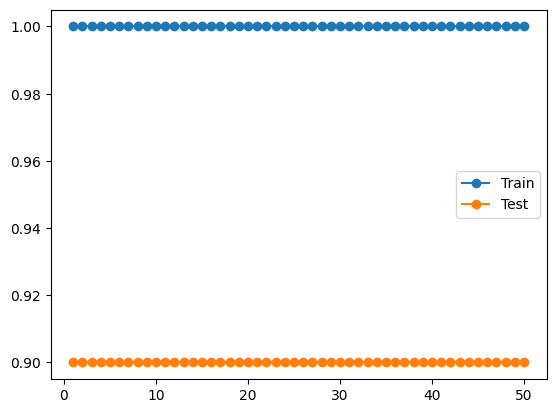

In [123]:
from matplotlib import pyplot
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [100]:
len(zoo)

70

In [101]:
y_pred = clf.predict(test)

In [102]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 5, 5, 3, 3,
       5, 5, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       6, 7, 6, 6], dtype=int64)

In [108]:
import sklearn
from sklearn.metrics import accuracy_score,classification_report

print(f"Accuracy = {metrics.accuracy_score(ans, y_pred)}") #準確度
print(f"答對題數 = {accuracy_score(ans, y_pred, normalize=False)}(總共{len(zoo)}題)")
print()
print()
print(classification_report(ans, y_pred)) #模型結果表

Accuracy = 0.9
答對題數 = 63(總共70題)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        20
           3       1.00      0.50      0.67         8
           4       1.00      1.00      1.00         8
           5       0.60      1.00      0.75         6
           6       0.62      1.00      0.77         5
           7       1.00      0.25      0.40         4

    accuracy                           0.90        70
   macro avg       0.89      0.82      0.80        70
weighted avg       0.94      0.90      0.89        70



In [93]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ans, y_pred))
print(accuracy_score(ans, y_pred, normalize=False))

0.9
63
